In [37]:
# These examples are from an earlier course that used tensorflow v1.
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# dataviz imports
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default. 
sns.set_style("darkgrid") # set a grey grid as a background
# quell warnings
import warnings
warnings.filterwarnings('ignore')

## MNIST DataSet with the Multi-Perceptron Model

### Character Recognition

The *MNIST* Data set is a collection of arrays representing Hand Written Digits (0-9) using pixels

This set of lectures will use the *Classical* model of using TensorFlow

The next will use the *Esimator* model. This is more like using Scikit-Learn where you create an input function, train a model with it then use it to make predictions.

For this series of lectures we'll use the more Manual way.




In [38]:
# Old method
#from tensorflow.examples.tutorials.mnist import input_data
# New method
import input_data

The one_hot function provides a simple interface to convert class label integers into a so-called one-hot array, where each unique label is represented as a column in the new array.

In [39]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [40]:
type(mnist)

input_data._Datasets

Notice that the mnist object has a number of labels (.train, .test, .images, etc)

In [41]:
# This is just a series of NumPy arrays
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Note the Labels that were applied by one_hot encoding. 

In [42]:
# Note that the labels are "one_hot" encoded. 
# Each of the label positions stands for the number it represents (like IPv4)
#[0,1,2...]
mnist.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [43]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

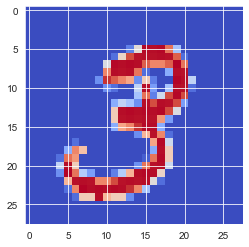

In [44]:
# If we visualize array 1, notice that everything is empty except label 3
# [0,1,2,3,4,5,6,7...] - only place 3 (array element 4) is True
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='coolwarm')

In [45]:
# 55000 images with 784 pixes per image
mnist.train.images.shape

(55000, 784)

In [46]:
# Confirm the number of examples
mnist.train.num_examples

55000

In [47]:
# Note that the test examples are about 1/5th of the total
mnist.test.num_examples

10000

Now visualize the dataset

In [48]:
# grab a single image
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:
mnist.train.images[1].shape

(784,)

We want to change this from being a string of 784 pixels to a dataset with a shape of 28x28 (the original dataset size - 28 * 28= 784) 

In [50]:
mnist.train.images[1].reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

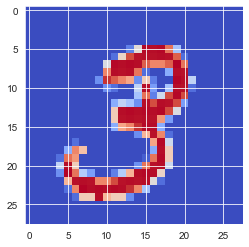

In [51]:
# Now plot it out with plt.imshow
plt.imshow(mnist.train.images[1].reshape(28,28), cmap='coolwarm')

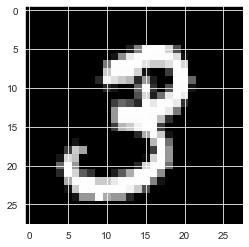

In [52]:
# If we wanted to visualize this in Grayscale, add the cmap
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

We actually don't want to pass this in with the visualizeable format, we want to pass it in as 784,1 - a Vector of numbers. 

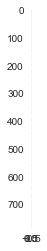

In [53]:
# Doesn't really show us anything - aspect too small - nothing to show
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray')

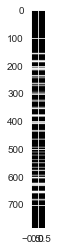

In [54]:
# to slightly improve this, but still not recognizable
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.02)

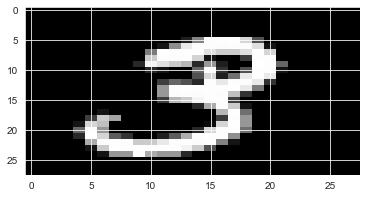

In [55]:
# Can also show horizontally  and now the character is visually recognizable
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray',aspect=0.5)

### Creating a tensorflow model to classify the data

All of this is a longhand way of doing things that will be simpler using TensorFlow Estimators for real world data. This is an example to pull back the curtains and see the longhand

**Now to create the model**

Notice how the second dimension of x = the first dimension of W (784) and that W's second variable matches up with b's first (only) variable  
e.g  
x [None,784]  
W [784,10]  
b [10]  

In [56]:
# Create a placeholder with dtype and a shape
# We also want to break them up into batches
# weirdly, "shape" is also used to batch. So:
# shape=[None,784] means "[batchsize,vectorsize]" without a definition yet for batchsize
x = tf.placeholder(tf.float32,shape=[None,784])

In [57]:
# now define weights
# tf.zeros(shape, dtype=tf.float32, name=None) - 
# in this case 784 is the shape and 10 means that we expect 10 possible target labels (0-9)
W = tf.Variable(tf.zeros([784,10]))

In [58]:
# Now add Biases
b = tf.Variable(tf.zeros([10]))

**Now to create the graph/Tensor object**


In [59]:
# Creating the graph with Matrix Multiply
y=tf.matmul(x,W)+ b

In [60]:
# The Tensor object
y

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [61]:
type(y)

tensorflow.python.framework.ops.Tensor

#### Create an object with the Correct Labels


In [62]:
# Here we pass in the Correct labels
# Notice how this is very similar to the original x.
# the shape=[a label for the batch, 10 possible values]
# e.g

y_true = tf.placeholder(tf.float32,shape=[None,10])

In [63]:
# the 10 matches the hot encoding labels (see above)
len(mnist.train.labels[1])

10

#### Now find a Loss and Optimizer

This takes care of the mathematics of running the gradient descent optimizer then minimizing that error. 

Sidenote:
Logits is an overloaded term which can mean many different things: In Math, Logit is a function that maps probabilities ( [0, 1] ) to R ( (-inf, inf) ) Probability of 0.5 corresponds to a logit of 0. Negative logit correspond to probabilities less than 0.5, positive to > 0.5.

Essentially   
**Optimizer** is the *Method of how you're trying to reduce the error*  
and  
**Cross Entropy** is *how you're actually defining the error*

You can think of Cross Entropy as a fancy way of saying "the actual error"

**Cross Entropy**

In [64]:
# Set Cross Entropy
# here we say that the correct labels can be found in y_true and the logits (what we're predicting)=y
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

**Optimizer**

In [65]:
# Set up Optimizer. 
# Play around with learning_rate - lower means slower, but more accurate (and the reverse is true)
# "guess and check"
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [66]:
# Here we say "Grab that optimizer and Minimize these types of errors"
train = optimizer.minimize(cross_entropy)

#### Everything up to this point has been defined but not run yet. 

Everything is essentially a *Static Graph* until we tell them to run at Session


### Creating a session

#### Initialize the variables

In [67]:
# Initializing the variables
init = tf.global_variables_initializer()

When running this should get close to 90% accuracy with just this setup. This isn't great since we're already working with well known data. Very Good Models get over 99% accuracy with Convolutional Network Models.


#### Running the session

And that's that. 

**You now have an estimation using *Classical TensorFlow***

In [68]:
# Now run the session
with tf.Session() as sess:
    # first run the initializer
    sess.run(init)
    # then train the model for a certain amount of steps, in this case 1000
    for step in range(1000):
        # mnist has a built-in convenience method for training the next batch. 
        # Real world is less likely to have these
        # Define the Batch Size as 100, then grab their x values and y target labels
        batch_x, batch_y = mnist.train.next_batch(100)
        # passing in the batches to the placeholders we defined earlier
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
    # where are these equal to each other between my predicted labels vs the true label actually is    
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    # Calculate accuracy
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    # print out accuracy
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9216
